In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from pathlib import Path
import visualization as vis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Min value: -1.000
Max value: 1.000


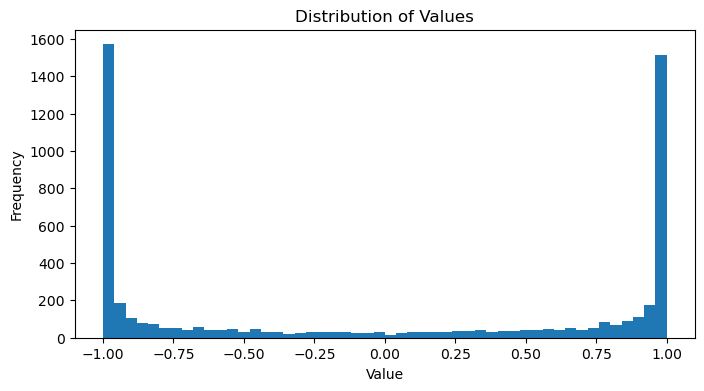

In [4]:
# Generate data with strong negative and positive correlations
beta_samples = np.random.beta(0.15, 0.15, size=5460)  # Even more extreme U-shape
var1 = 2 * beta_samples - 1  # Scale to [-1, 1]
# Verify the extremes
print(f"Min value: {var1.min():.3f}")
print(f"Max value: {var1.max():.3f}")

# Check the distribution
plt.figure(figsize=(8, 4))
plt.hist(var1, bins=50)
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [15]:
map_data = vis.vec2mat(var1)

In [16]:
change_order = vis.getOrderedMap(map_data)

NameError: name 'range_val' is not defined

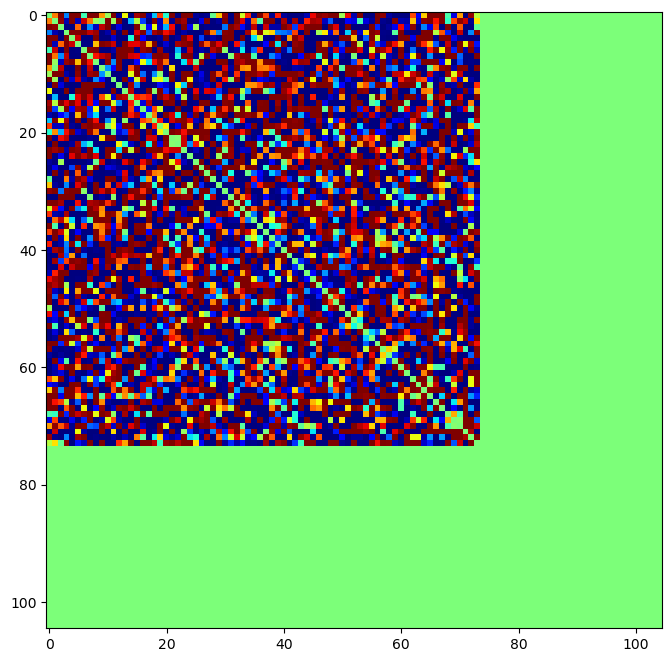

In [14]:
# Get the directory where this script is located
current_dir = Path.cwd()
excel_path = current_dir / "visualization" / "cmp" / "ICNs_v2.xlsx"

# Read and process network information
df = pd.read_excel(excel_path)
T = df.values
icn_idx = df.columns.get_loc('Label')

# Define networks and their labels
network_info = [
    ('Visual Network', 'VI'),
    ('Cerebellar network', 'CB'),
    ('Temporal network', 'TM'),
    ('Subcortical network (SC)', 'SC'),
    ('Sensorimotor network (SM)', 'SM'),
    ('Higher Cognition network (HC)', 'HC')
]

# Process networks
networks = {}
all_indices = []
positions = []
labels = []
current_pos = 0

# Extract indices for each network
for name, label in network_info:
    idx = np.where([str(x) == name for x in T[:, icn_idx]])[0]
    if len(idx) > 0:
        indices = T[idx, 0].astype(int) - 1  # Convert to 0-based indexing
        networks[name] = {'indices': indices, 'label': label}
        
        # Update visualization parameters
        size = len(indices)
        all_indices.extend(indices)
        positions.append(current_pos + size/2)
        labels.append(label)
        current_pos += size


organized_data = np.zeros_like(map_data)


for i, idx_i in enumerate(all_indices):
    for j, idx_j in enumerate(all_indices):
        organized_data[idx_i, idx_j] = map_data[idx_i, idx_j]

# Ensure symmetry while preserving negative values
organized_data = np.triu(organized_data) + np.triu(organized_data, k=1).T


# Visualization
plt.figure(figsize=(10, 8))

# Plot correlation matrix
im = plt.imshow(organized_data, 
                cmap='jet',
                aspect='equal',interpolation='none')

# Set color scaling
if range_val is not None:
    vmin, vmax = range_val
    im.set_clim(vmin, vmax)
else:
    max_abs = np.max(np.abs(organized_data))
    im.set_clim(-max_abs, max_abs)

# Add colorbar
cbar = plt.colorbar(im, extend='both')
tick_values = [-1.0, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1.0]
cbar.set_ticks(tick_values)
cbar.set_ticklabels([f'{x:.2f}' for x in tick_values])

# Set labels and title
plt.xticks(positions, labels, rotation=45)
plt.yticks(positions, labels)
plt.title('Network Connectivity Map')

# Adjust layout and save
plt.tight_layout()
if save_path:
    plt.savefig(save_path, bbox_inches='tight', dpi=300)

plt.show()


